## ⛏️ 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)

## 📊 2. Plot Configuration 

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

## 3. Loading Dataset
Let's first check the dataset to get a first insight.

In [3]:
salaries = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv", index_col=0)
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


## 💡 4. Understanding the Data
Dataset consists of 11 features.
1. **work_year**: The year the salary was paid.
2. **experience_level**: The experience level in the job during the year.
    - EN (Entry-level) / Junior
    - MI (Mid-level) / Intermediate 
    - SE (Senior-level) / Expert
    - EX (Expert-level) / Director
3. **employment_type**: The type of employment for the role.
    - PT (Part-time)
    - FT (Full-time)
    - CT (Contact)
    - FL (Freelance)
4. **job_title**: The role worked during the year.
5. **salary**: The total gross salary amount paid.
6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
    - USD (United States Dollar)
    - EUR (Euro)
    - GBP (Great Britain Pound)
    - ...
7. **salary_in_usd**: The salary in USD(United States Dollars).
8. **employee_residence**: Employee's primary country of residence in during the work year as ISO 3166 country code.
    - DE (Germany)
    - JP (Japan)
    - GB (Great Britain)
    - ...
9. **remote_ratio**: The overall amount of work done remotely.
    - 0 (No remote)
    - 50 (Partially remote)
    - 100 (Fully remote)
10. **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
    - DE (Germany)
    - JP (Japan)
    - GB (Great Britain)
    - ...
11. **company_size**: The average number of people that worked for the company during the year.
    - S (Small) (< 50)
    - M (Medium) (50 < & > 250)
    - L (Large) (> 250)


I will try to analyze the salaries only in **USD**. Therefore, I will remove the **salary_currency** and **salary** columns. Also change the name of the **salary_in_usd** column to just **salary**.

In [5]:
salaries.drop(labels=["salary", "salary_currency"], axis=1, inplace=True)
salaries.rename(columns={"salary_in_usd": "salary"}, inplace=True)

In [6]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### 4.1 Checking Null Values
First let's check the dataset if it contains any null values.

In [7]:
salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no null values in the dataset which is good for us.

## 🔎 5. Exploratory Data Analysis

### 5.1 Multivariate Analysis

#### 5.1.1 Analysis of Experience Level

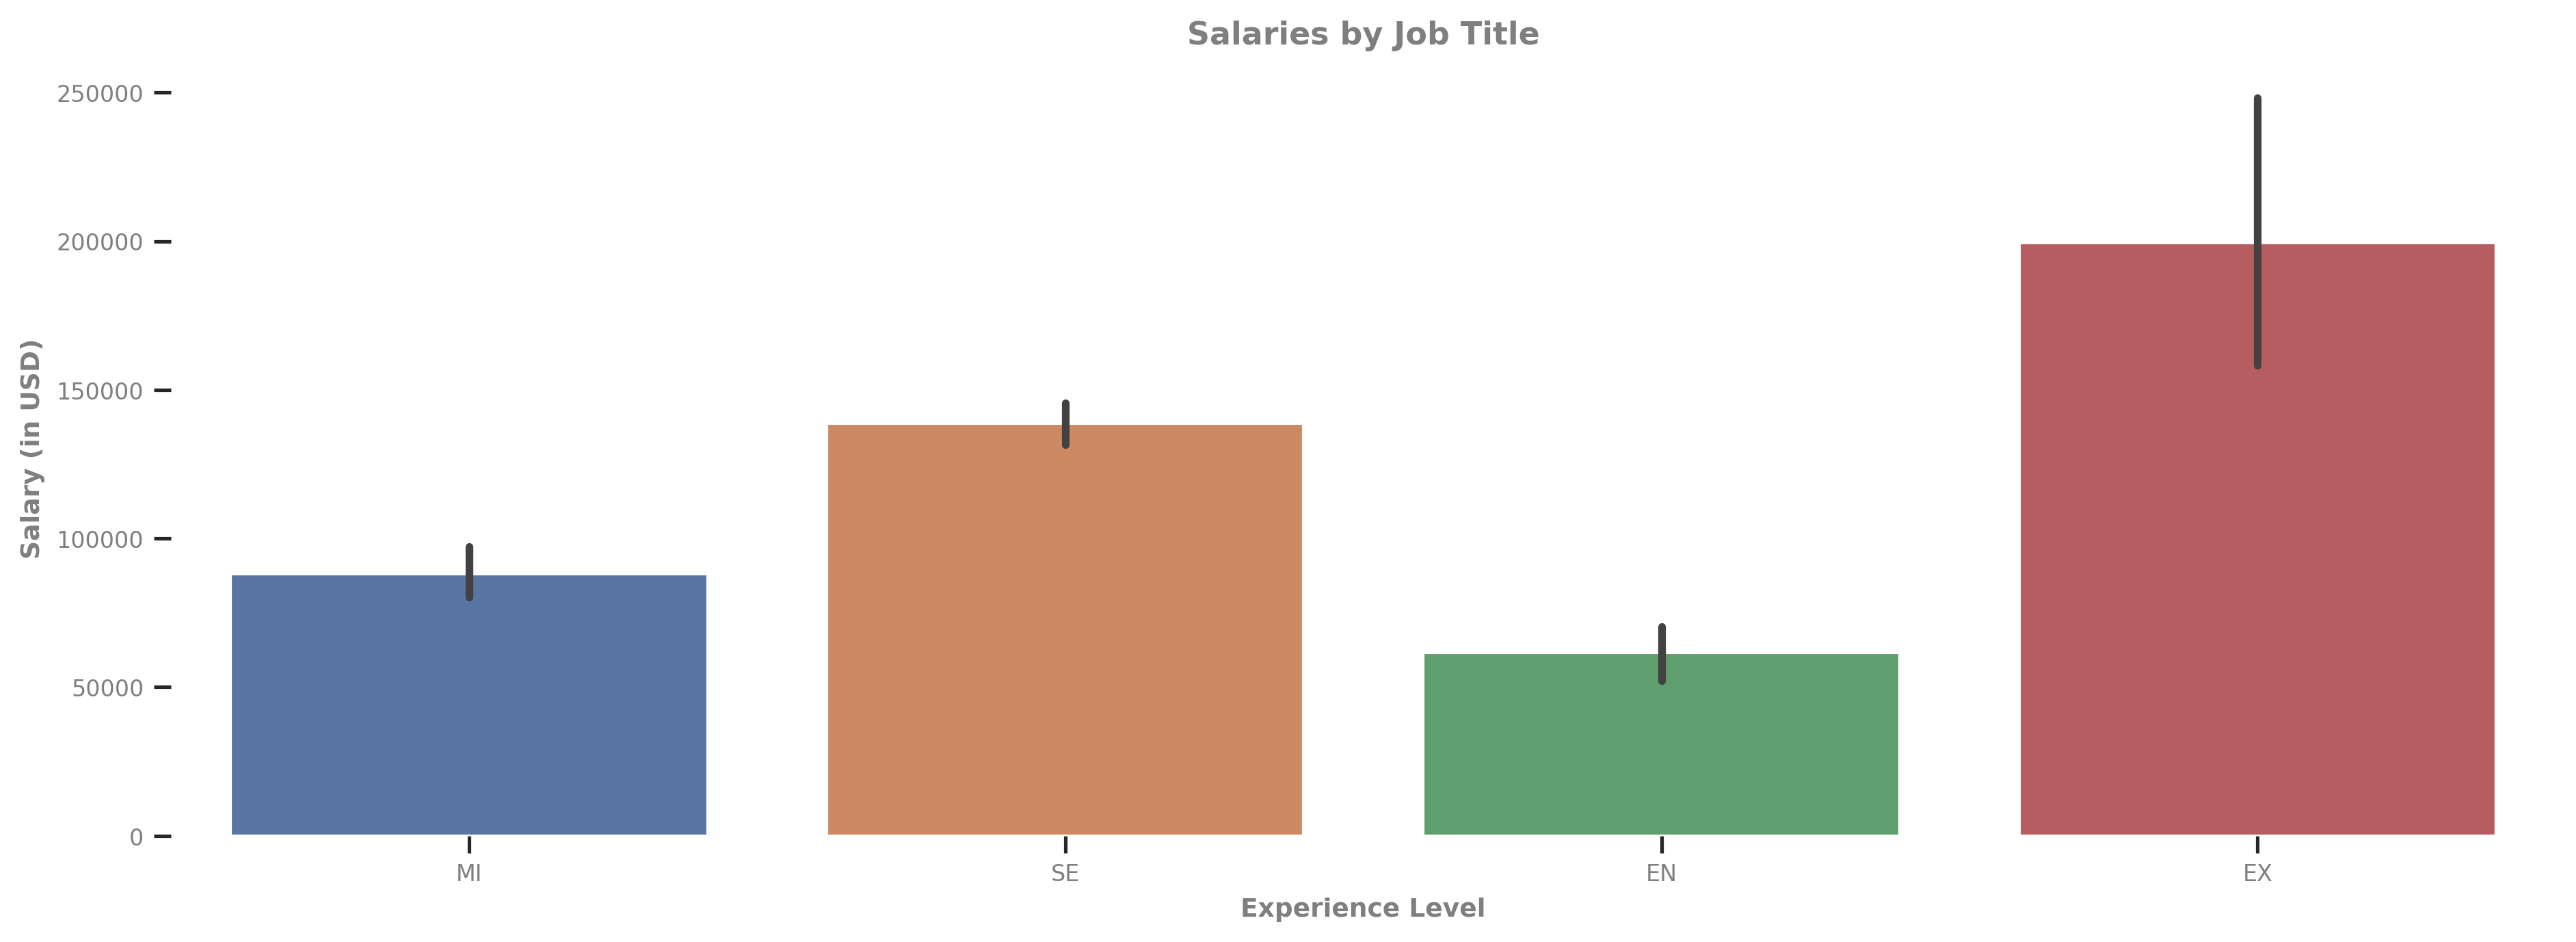

In [8]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="experience_level", y="salary")
plt.ylabel(ylabel="Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.xlabel(xlabel="Experience Level", size=9, fontdict=FIG_FONT)
plt.title(label="Salaries by Job Title", size= 11, fontdict=FIG_FONT)
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.xticks(fontname="Helvetiva, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.2 Analysis of Employment Type

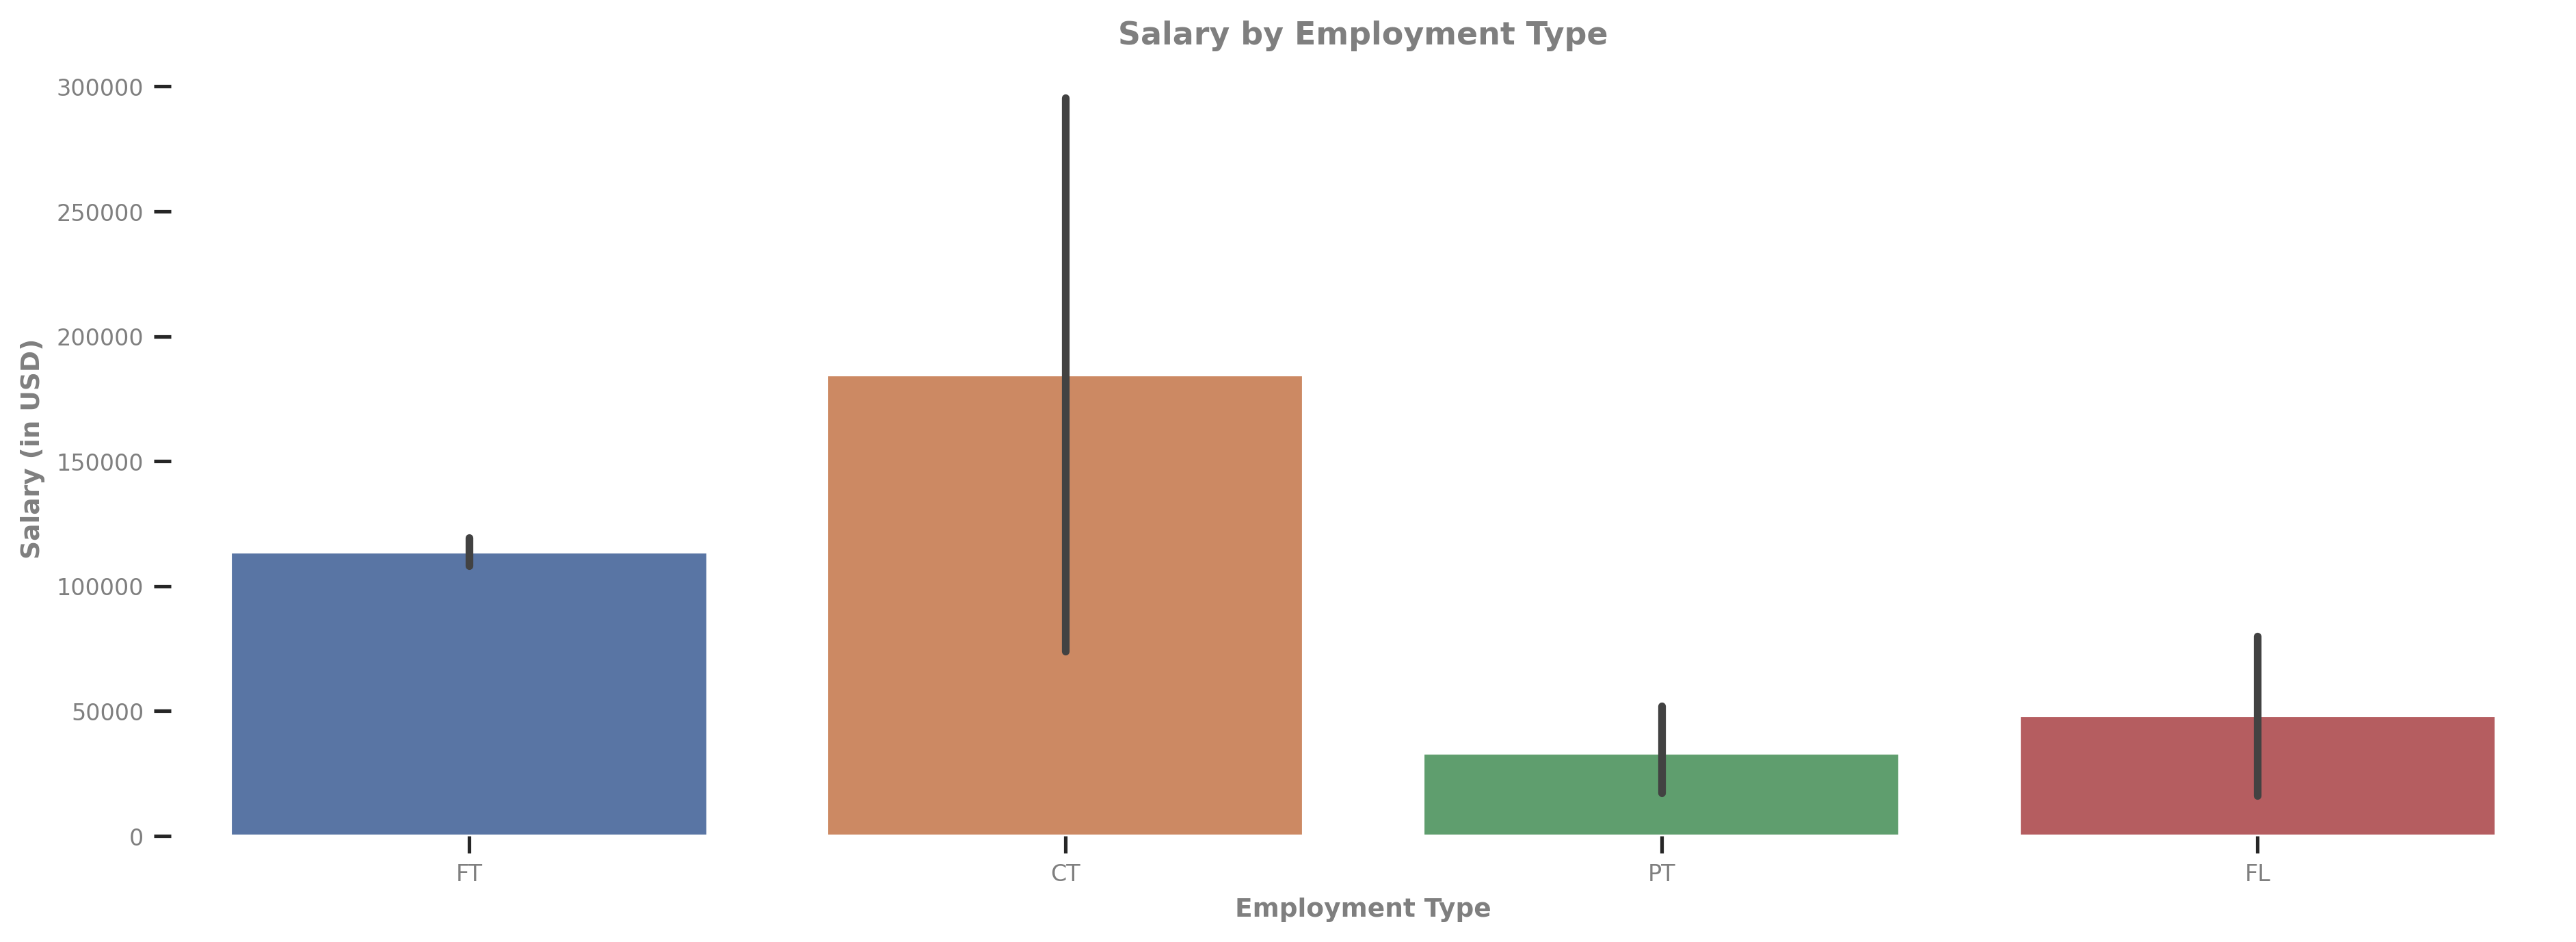

In [9]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="employment_type", y="salary")
plt.xlabel(xlabel="Employment Type", size=9, fontdict=FIG_FONT)
plt.ylabel(ylabel="Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title(label="Salary by Employment Type", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetiva, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetiva, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.3 Analysis of Remote Ratio

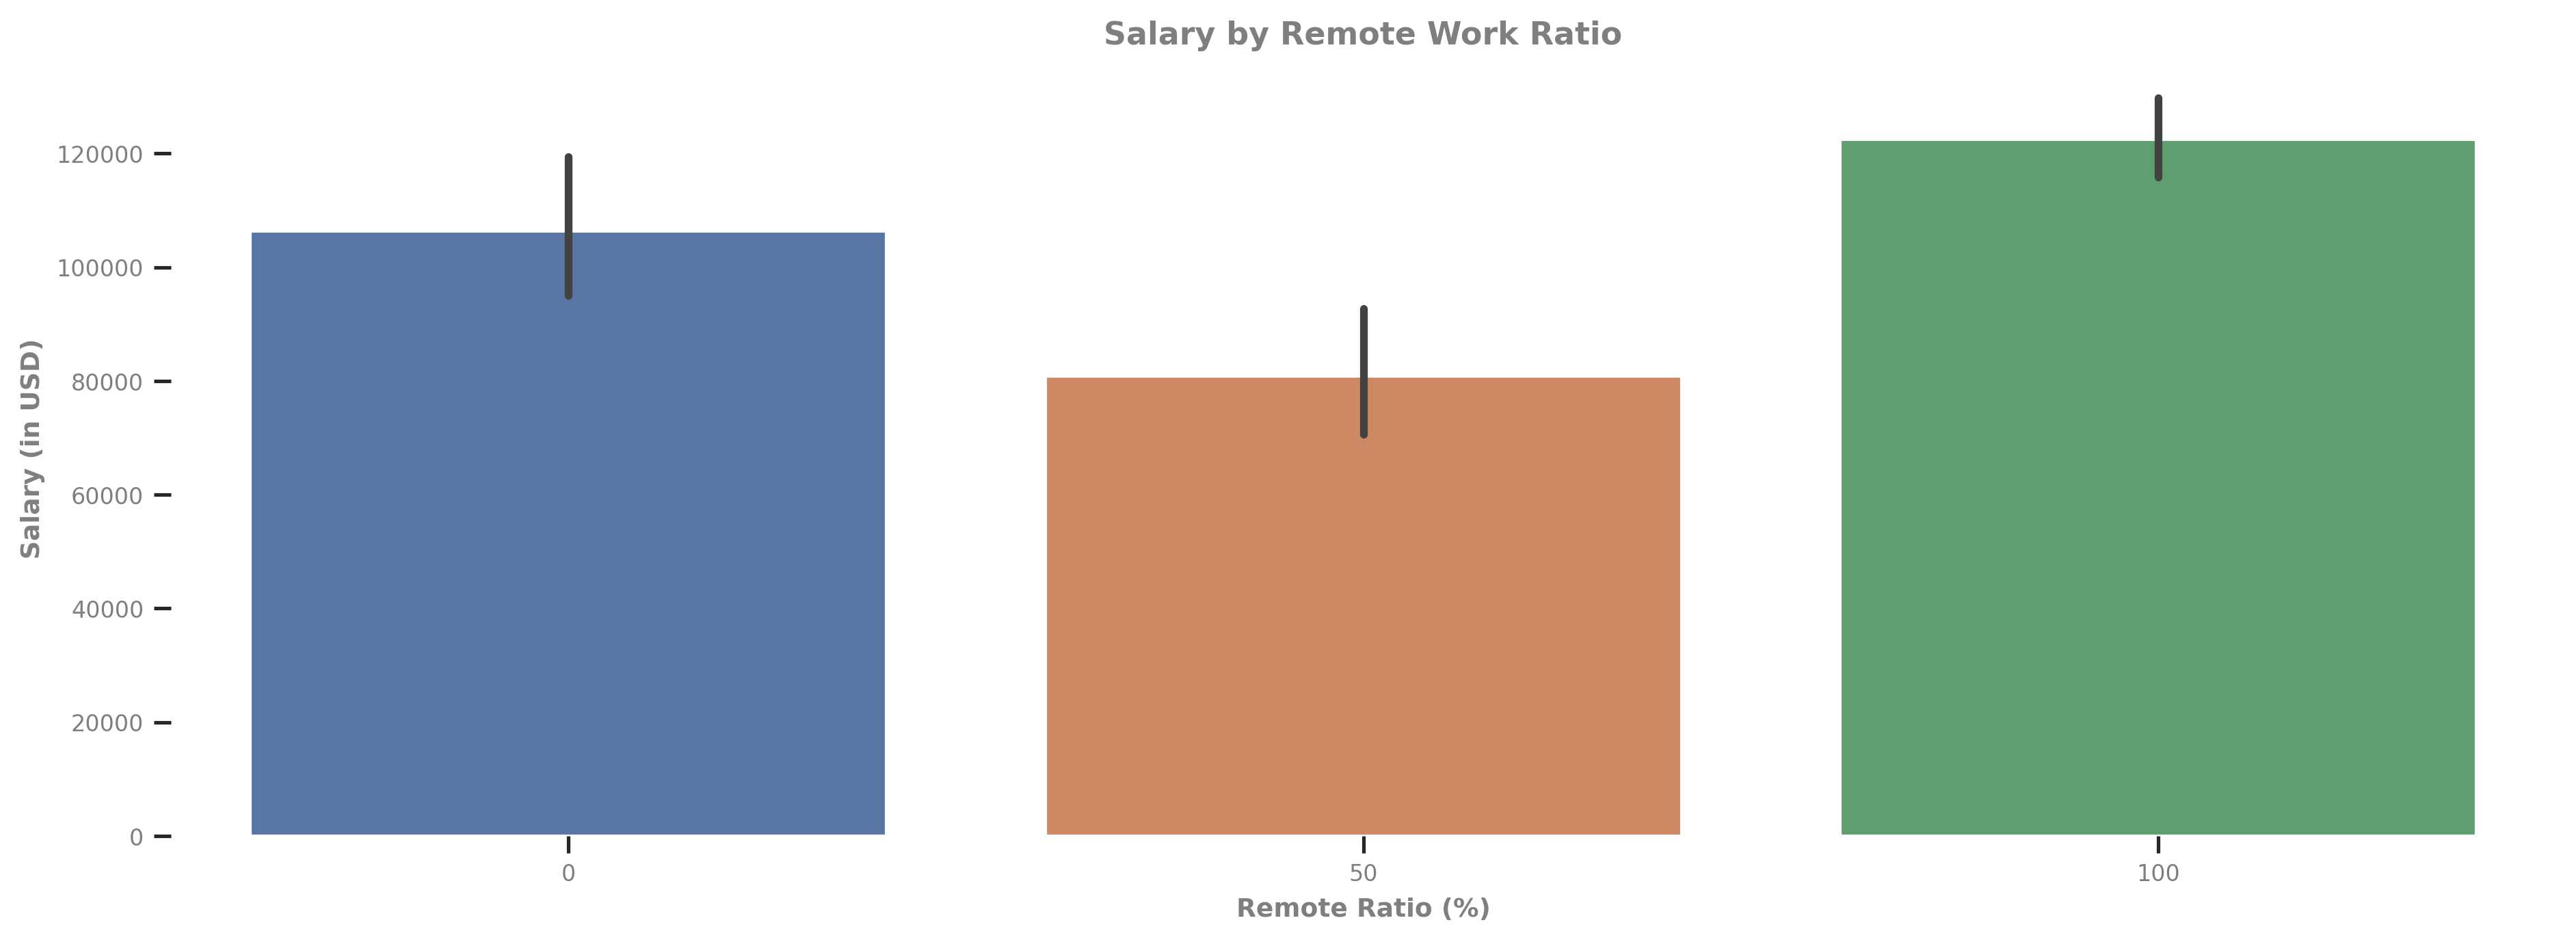

In [10]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="remote_ratio", y="salary")
plt.xlabel("Remote Ratio (%)", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Remote Work Ratio", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.4 Analysis of Company Size

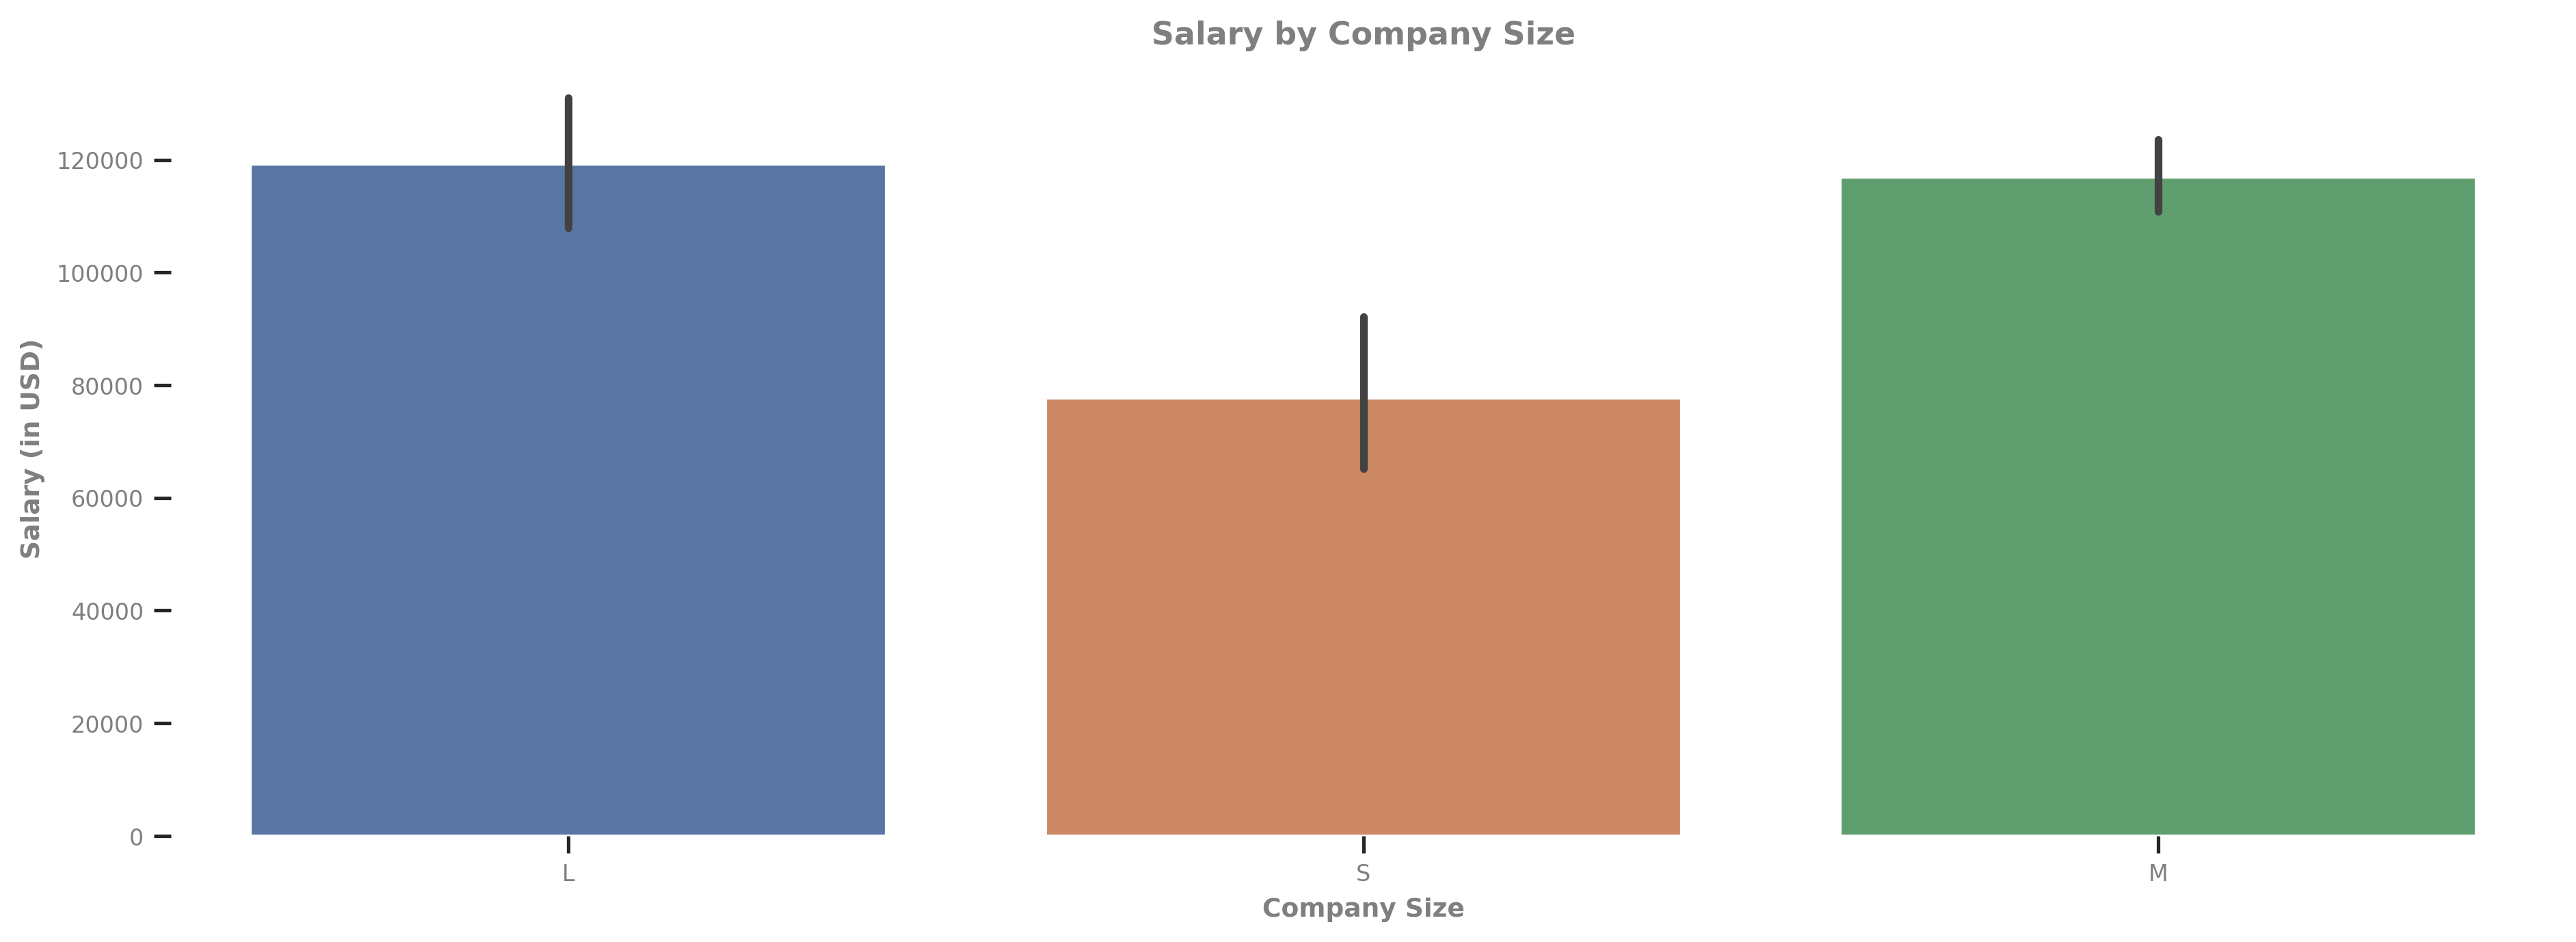

In [11]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="company_size", y="salary")
plt.xlabel("Company Size", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Company Size", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.5 Analysis of Company Location

In [12]:
salary_counts = pd.DataFrame(salaries.groupby("company_location").agg({"count"}).iloc[:, 0])
salary_counts.columns = ["count"]
common_countries = salary_counts[salary_counts["count"] > 1]
salaries_in_common_countries = salaries[salaries["company_location"].isin(common_countries.index)]

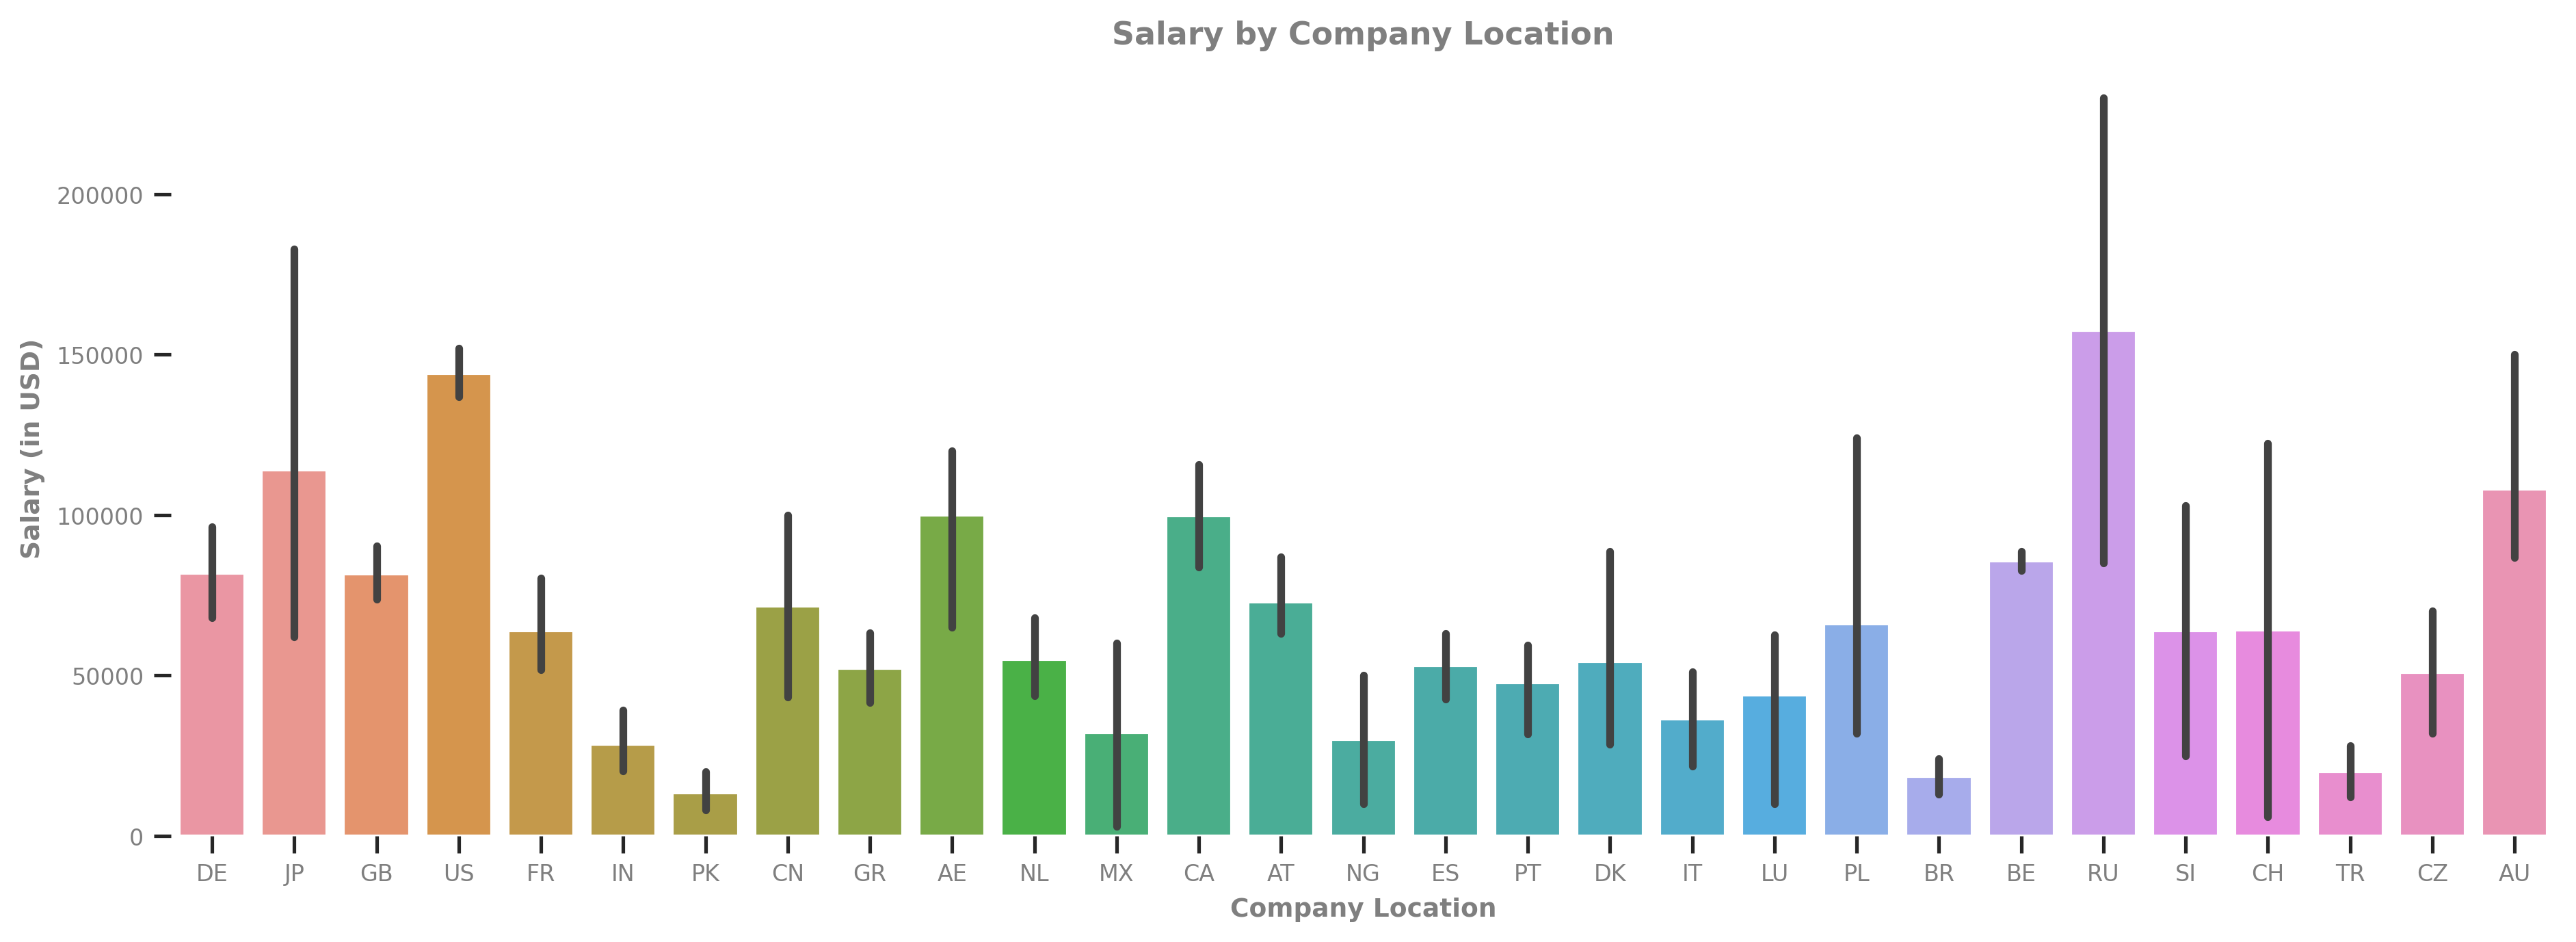

In [13]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries_in_common_countries, x="company_location", y="salary")
plt.xlabel("Company Location", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Company Location", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.6 Analysis of Work Year

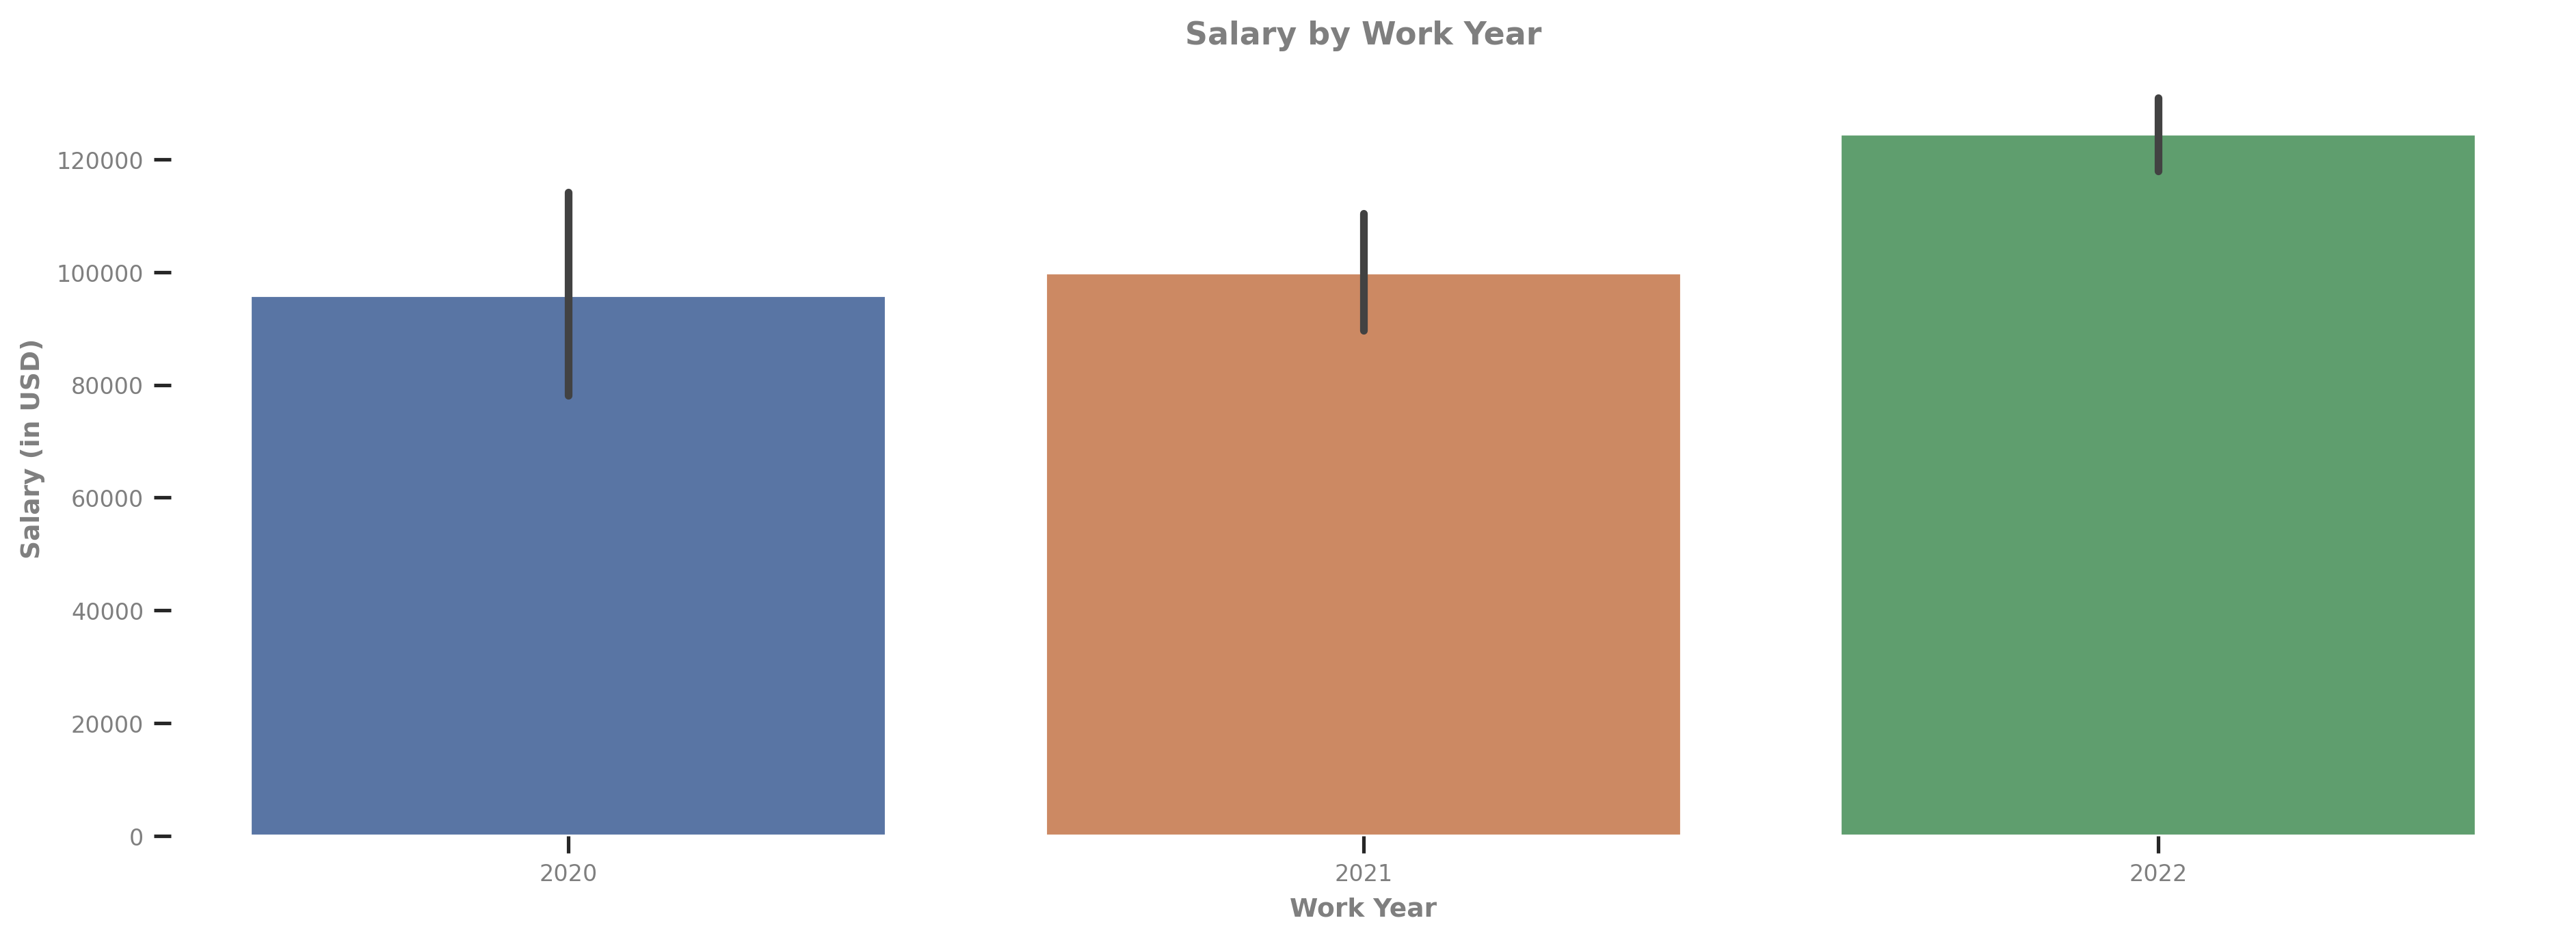

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="work_year", y="salary")
plt.xlabel("Work Year", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Work Year", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.7 Analysis of Employee Residence

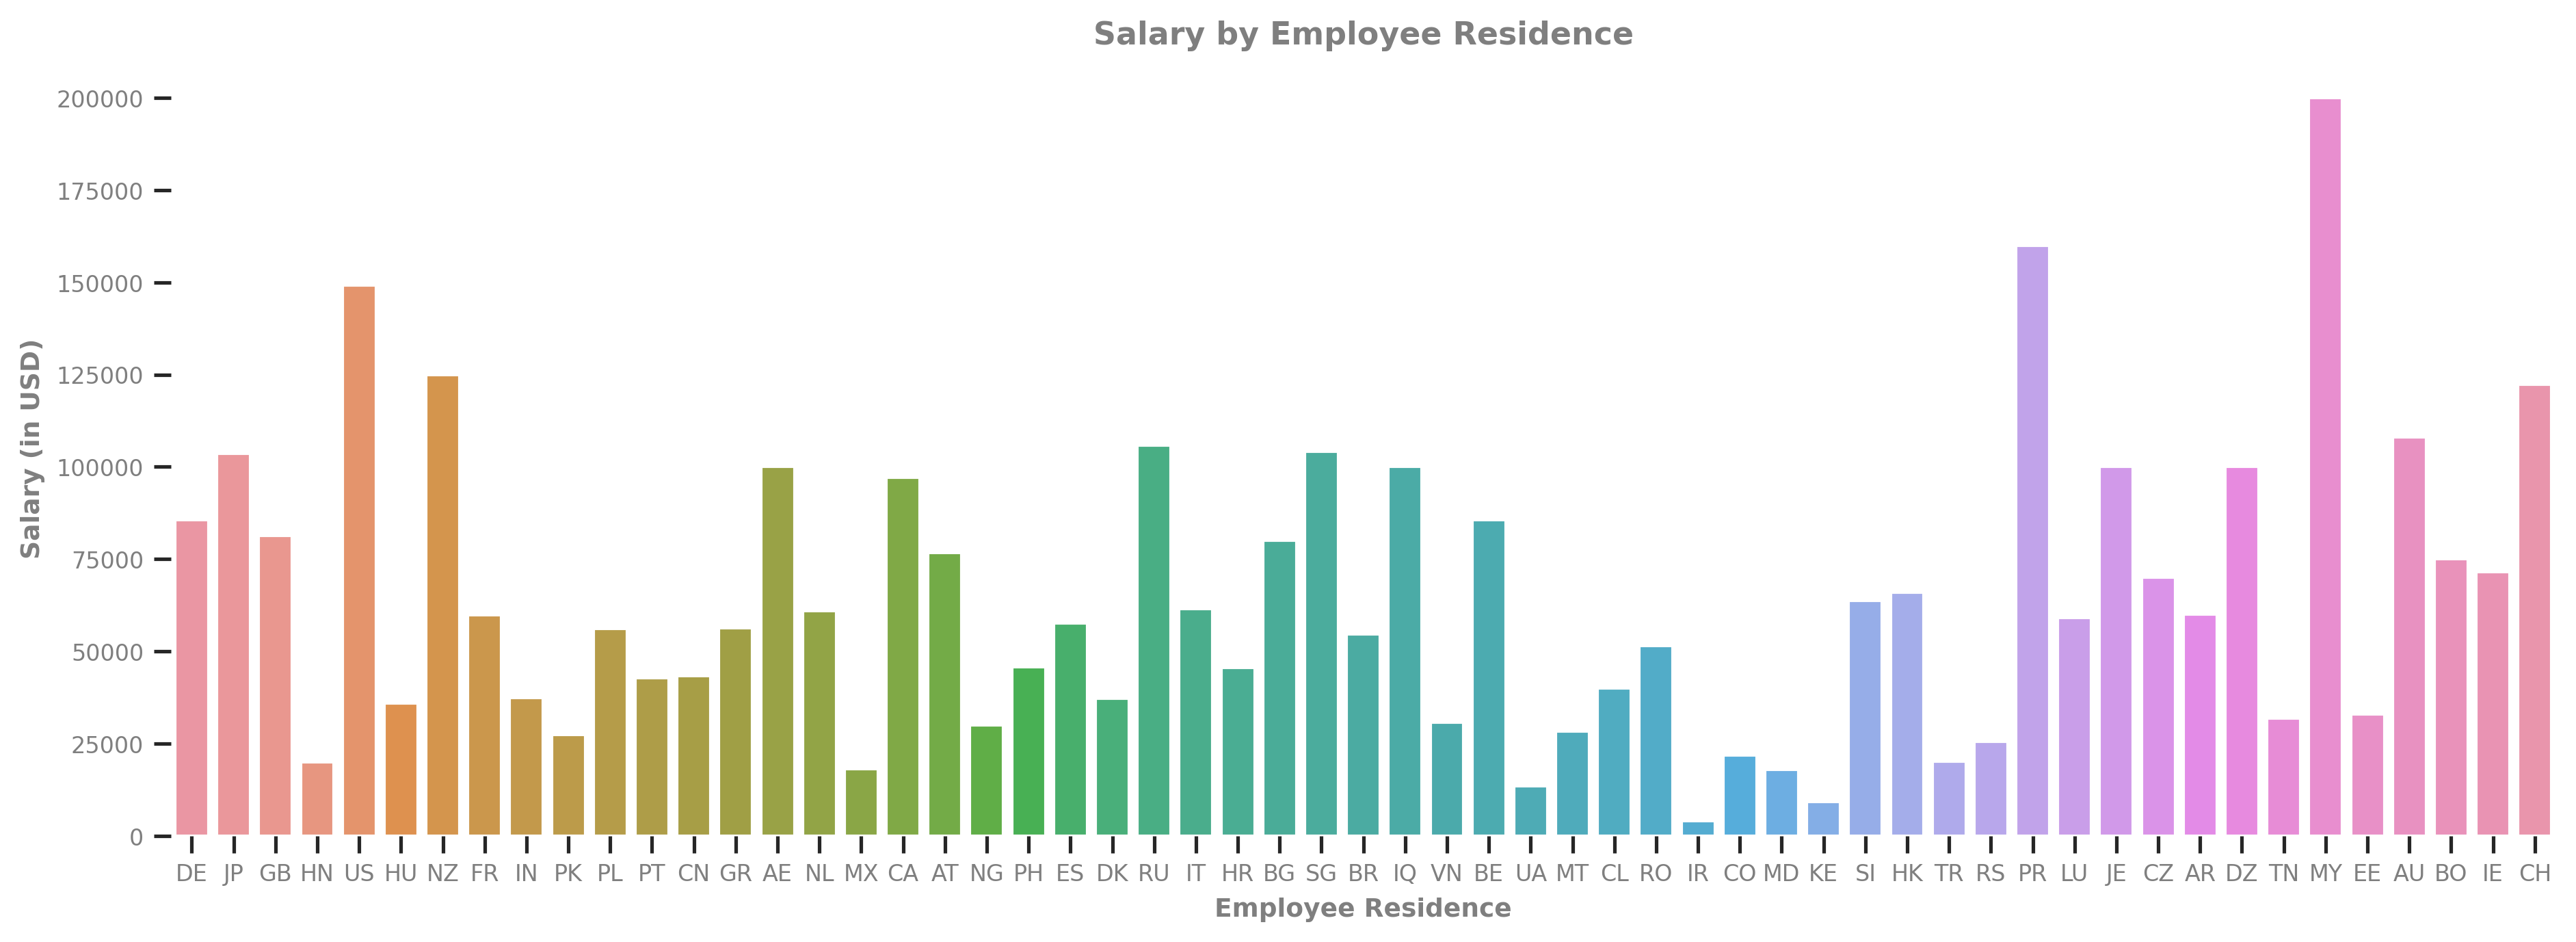

In [15]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="employee_residence", y="salary", ci=None)
plt.xlabel("Employee Residence", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Employee Residence", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.1.8 Analysis of Job Title

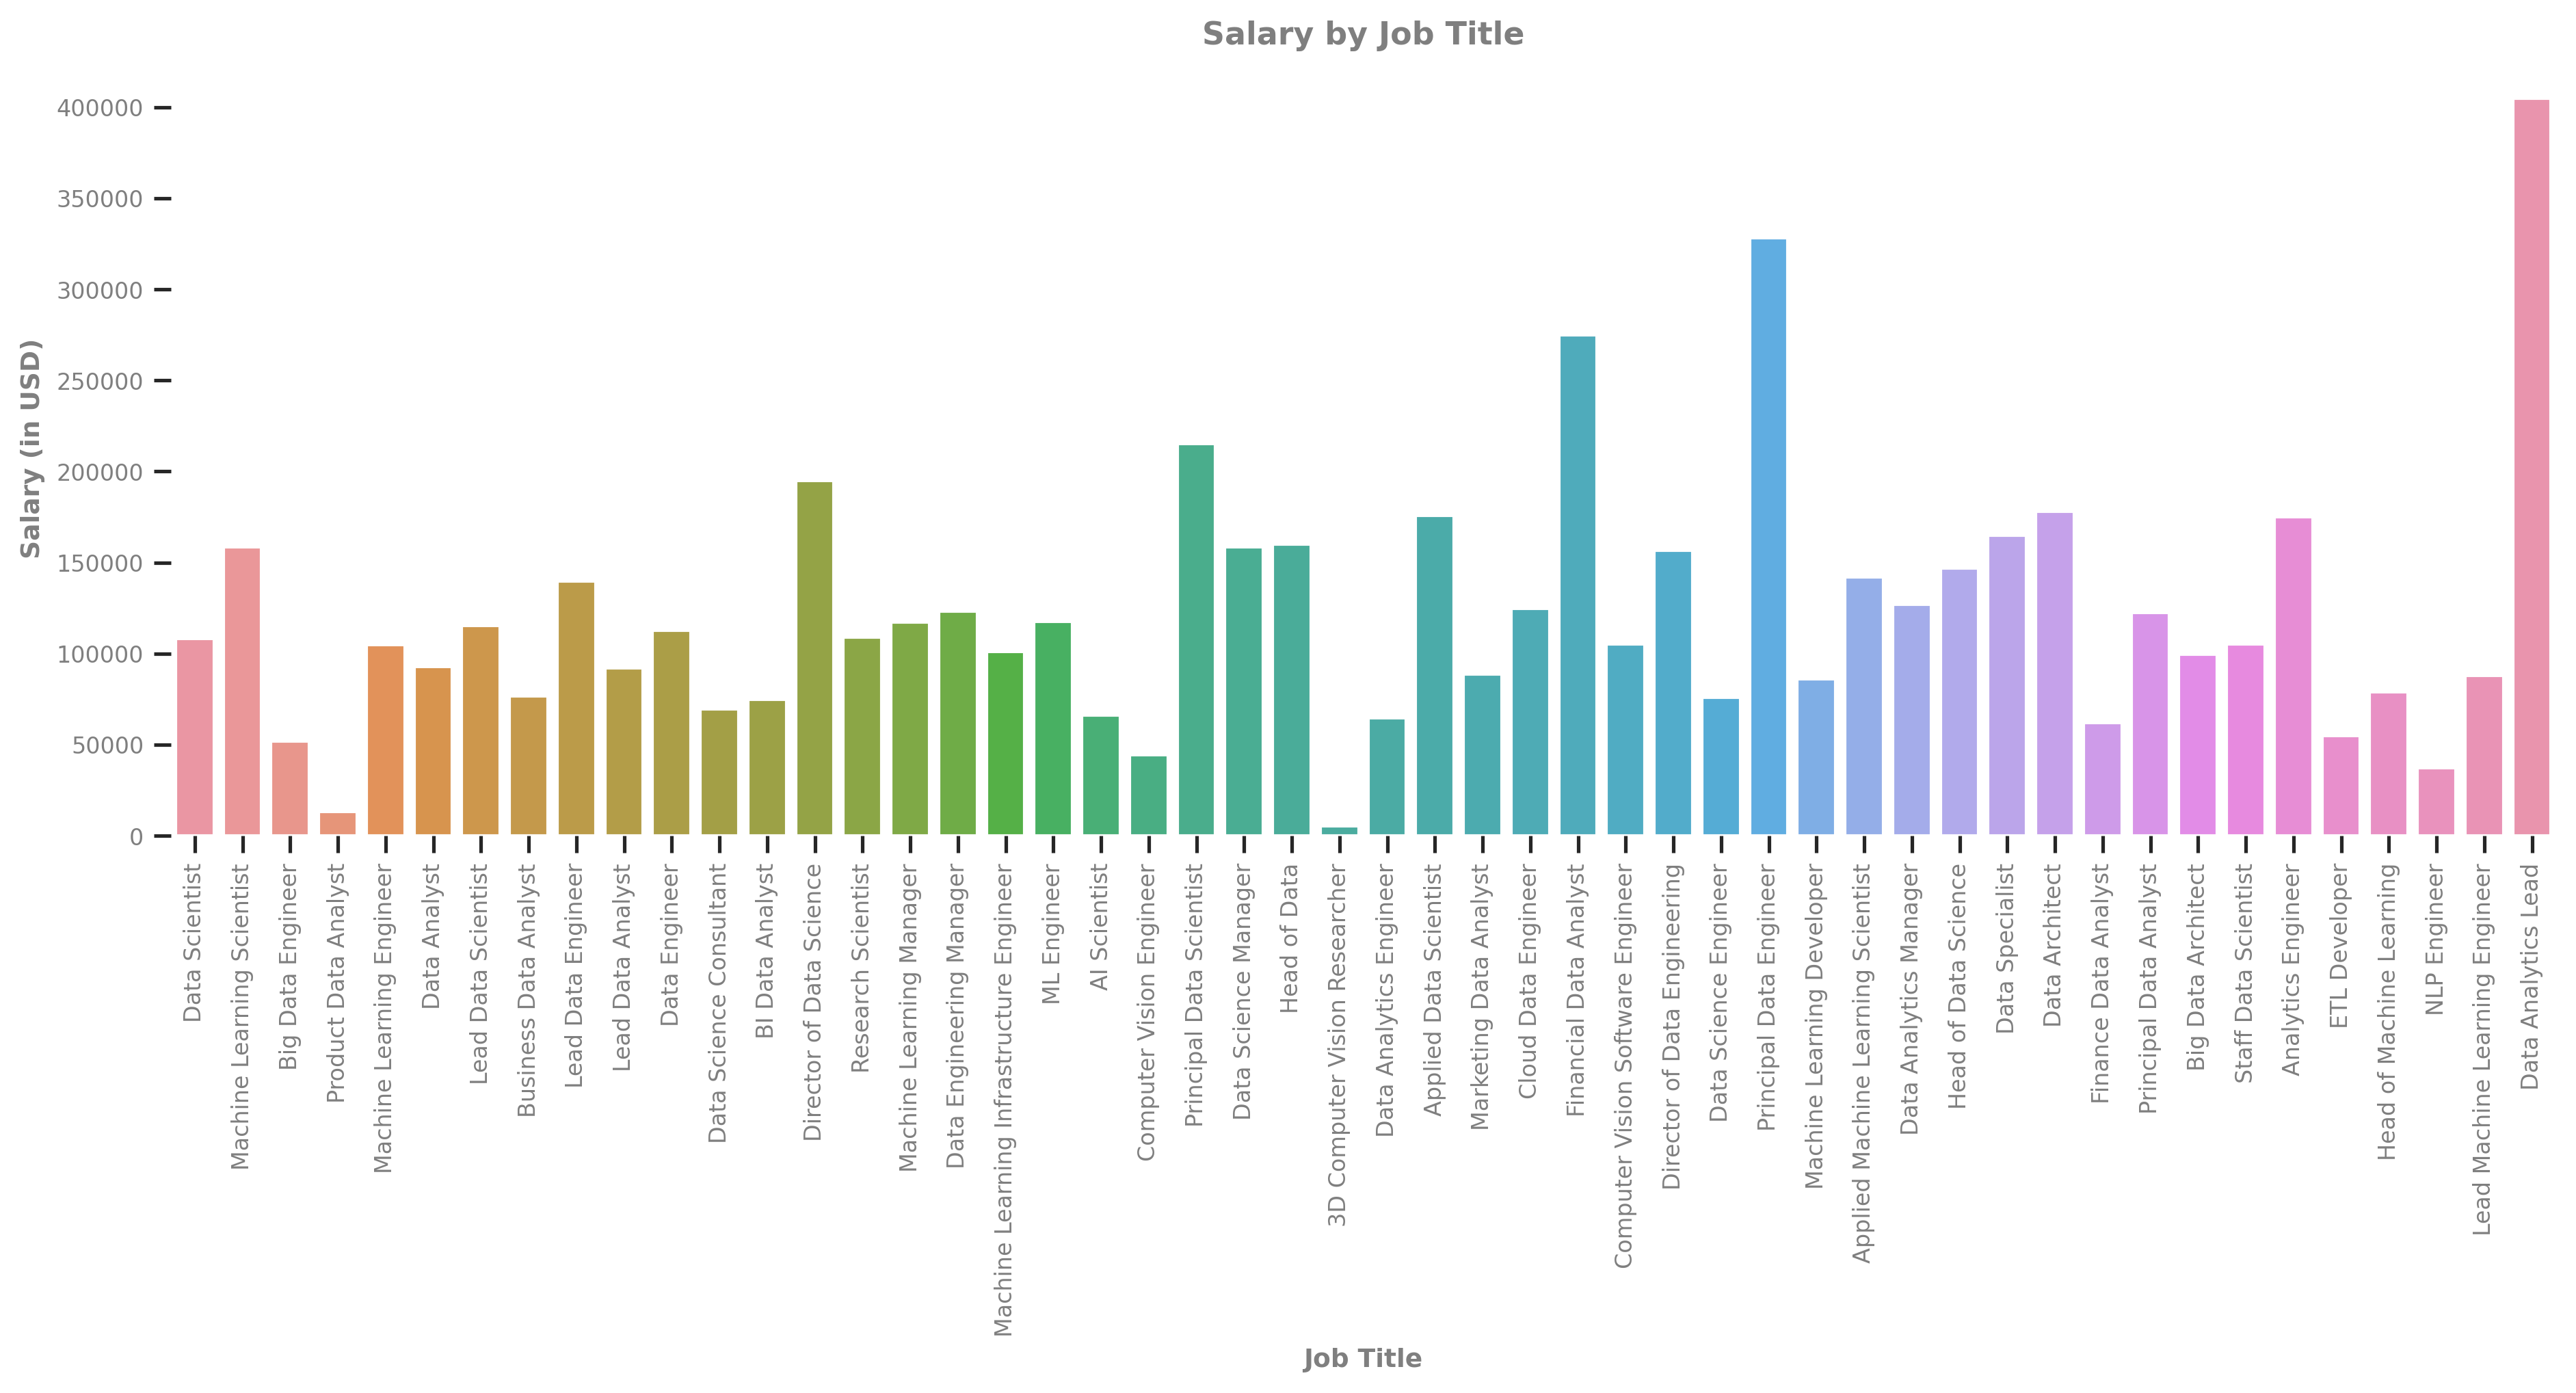

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="job_title", y="salary", ci=None)
plt.xlabel("Job Title", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Job Title", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f", rotation=90)
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()